C:\Users\KIIT\AppData\Local\Temp\ipykernel_1472\3325880747.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=tor

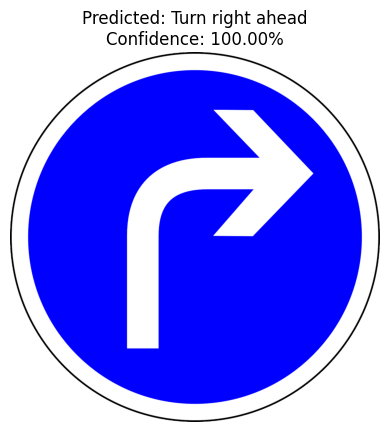

Predicted class index: 27
Predicted class: Turn right ahead
Confidence: 1.0000


In [32]:
import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the class mapping for traffic signs
class_map = {
    	0: "Speed limit (20km/h)", 
	1: "Speed limit (30km/h)", 
	12: "Speed limit (50km/h)", 
    	23: "Speed limit (60km/h)", 
	34: "Speed limit (70km/h)", 
	38: "Speed limit (80km/h)", 
   	 39: "End of speed limit (80km/h)", 
	40: "Speed limit (100km/h)", 
	41: "Speed limit (120km/h)", 
   	 42: "No passing", 
	2: "No passing for vehicles over 3.5 metric tons", 
   	 3: "Right-of-way at the next intersection", 
	4: "Priority road", 5: "Yield", 
   	 6: "Stop", 7: "No vehicles", 
	8: "Vehicles over 3.5 metric tons prohibited", 
   	 9: "No entry", 
	10: "General caution", 11: "Dangerous curve to the left", 
   	 13: "Dangerous curve to the right", 14: "Double curve", 15: "Bumpy road", 
   	 16: "Slippery road", 17: "Road narrows on the right", 18: "Road work", 19: "Traffic signals", 
    	20: "Pedestrians", 21: "Children crossing", 22: "Bicycles crossing", 24: "Beware of ice/snow", 
    	25: "Wild animals crossing", 26: "End of all speed and passing limits", 27: "Turn right ahead", 
    	28: "Turn left ahead", 29: "Ahead only", 30: "Go straight or right", 31: "Go straight or left", 
   	 32: "Keep right", 33: "Keep left", 35: "Roundabout mandatory", 36: "End of no passing", 
   	 37: "End of no passing by vehicles over 3.5 metric tons"
}

# Function to preprocess the image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Add batch dimension

# Load the custom model
model_path = "resnet_custom_fc_3.pth"
class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        # Fully connected layers
        self.linear1 = nn.Linear(512, 256)
        self.linear2 = nn.Linear(256, 43)

    def forward(self, x):
        # First layer with ReLU, batch norm, and dropout
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# Load ResNet18 and replace the final layer with the custom classifier
model = models.resnet18(pretrained=False)
model.fc = Dc_model()  # Use your custom classifier
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()  # Set model to evaluation mode

# Path to the test image
image_path = "Test Images/test1.png"  # Replace with the actual path
image_tensor = preprocess_image(image_path).to('cpu')  # Ensure the image is on CPU

# Forward pass through the model
with torch.no_grad():
    raw_output = model(image_tensor)  # Logits (raw predictions)

# Get the predicted class index and confidence
predicted_index = torch.argmax(raw_output, dim=1).item()
confidence = torch.nn.functional.softmax(raw_output, dim=1)[0][predicted_index].item()

# Display the image with predicted class and confidence
image = Image.open(image_path)

# Plotting the image
plt.imshow(image)
plt.axis('off')  # Hide axes

# Adding the predicted class name and confidence to the image
class_name = class_map[predicted_index]
plt.title(f"Predicted: {class_name}\nConfidence: {confidence*100:.2f}%", fontsize=12)

# Show the image
plt.show()

# Print results
print(f"Predicted class index: {predicted_index}")
print(f"Predicted class: {class_name}")
print(f"Confidence: {confidence:.4f}")


Mutliple Files



C:\Users\KIIT\AppData\Local\Temp\ipykernel_1472\2942572497.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=tor

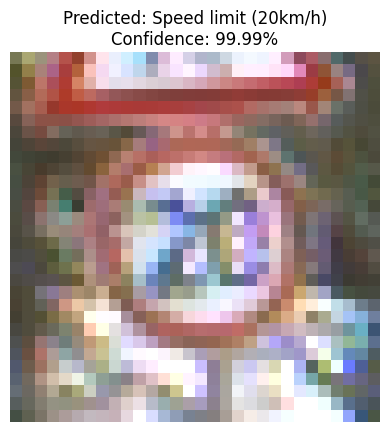

Image: class_0.png
Predicted class index: 0
Predicted class: Speed limit (20km/h)
Confidence: 0.9999


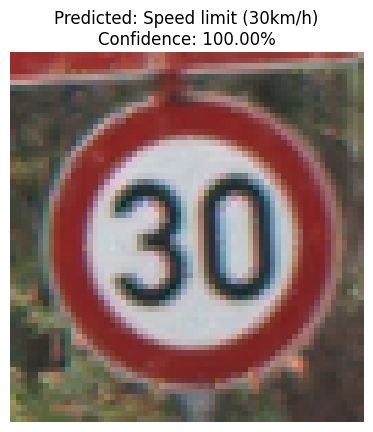

Image: class_1.png
Predicted class index: 1
Predicted class: Speed limit (30km/h)
Confidence: 1.0000


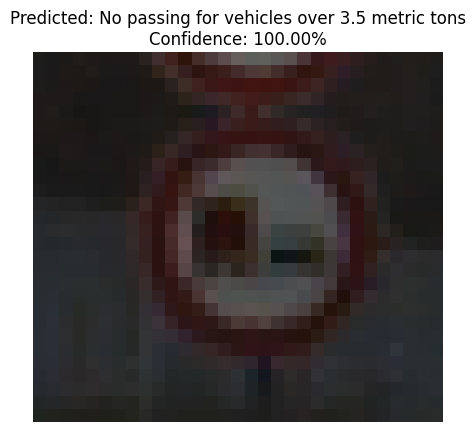

Image: class_10.png
Predicted class index: 2
Predicted class: No passing for vehicles over 3.5 metric tons
Confidence: 1.0000


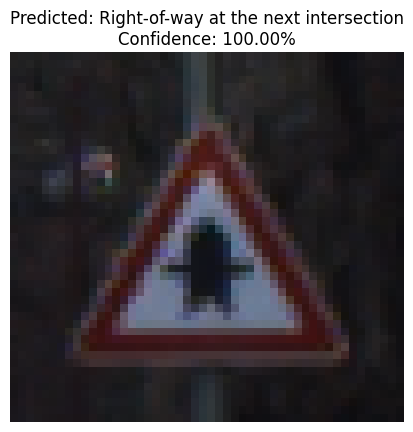

Image: class_11.png
Predicted class index: 3
Predicted class: Right-of-way at the next intersection
Confidence: 1.0000


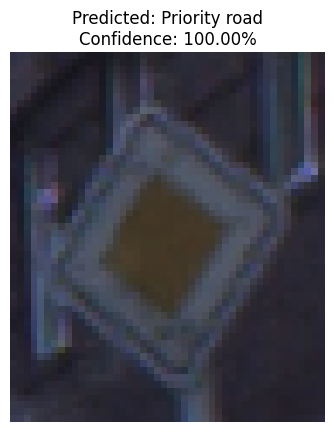

Image: class_12.png
Predicted class index: 4
Predicted class: Priority road
Confidence: 1.0000


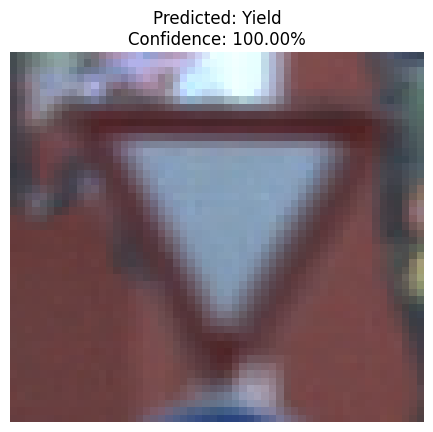

Image: class_13.png
Predicted class index: 5
Predicted class: Yield
Confidence: 1.0000


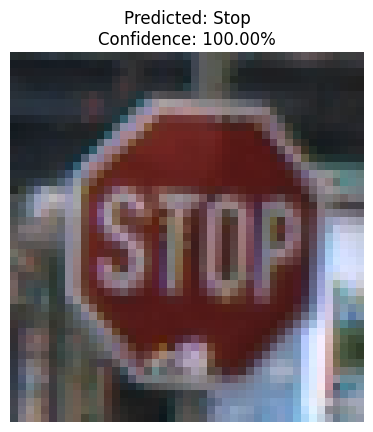

Image: class_14.png
Predicted class index: 6
Predicted class: Stop
Confidence: 1.0000


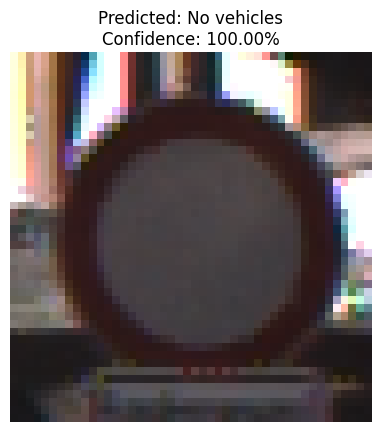

Image: class_15.png
Predicted class index: 7
Predicted class: No vehicles
Confidence: 1.0000


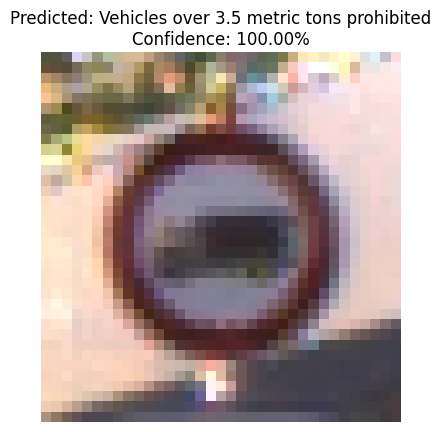

Image: class_16.png
Predicted class index: 8
Predicted class: Vehicles over 3.5 metric tons prohibited
Confidence: 1.0000


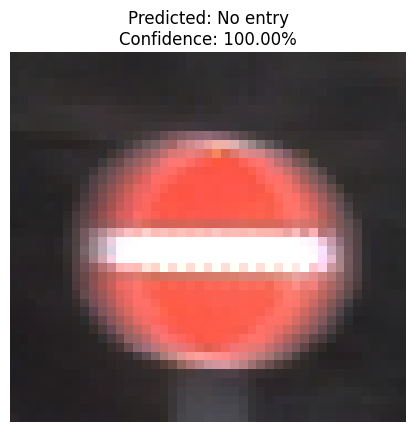

Image: class_17.png
Predicted class index: 9
Predicted class: No entry
Confidence: 1.0000


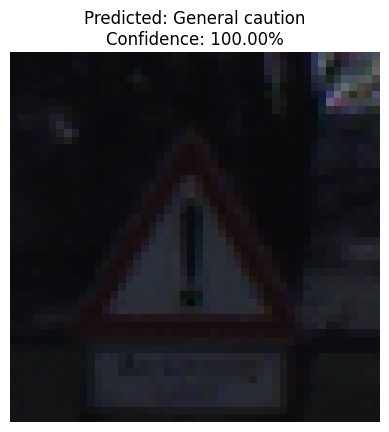

Image: class_18.png
Predicted class index: 10
Predicted class: General caution
Confidence: 1.0000


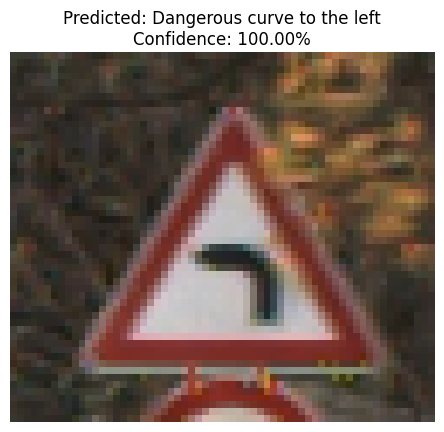

Image: class_19.png
Predicted class index: 11
Predicted class: Dangerous curve to the left
Confidence: 1.0000


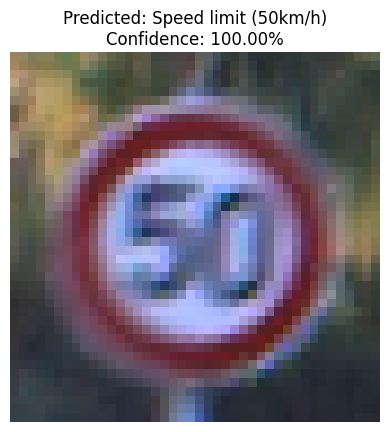

Image: class_2.png
Predicted class index: 12
Predicted class: Speed limit (50km/h)
Confidence: 1.0000


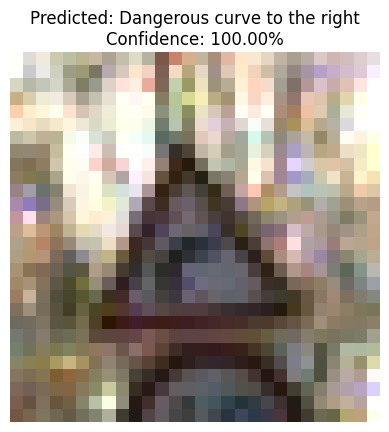

Image: class_20.png
Predicted class index: 13
Predicted class: Dangerous curve to the right
Confidence: 1.0000


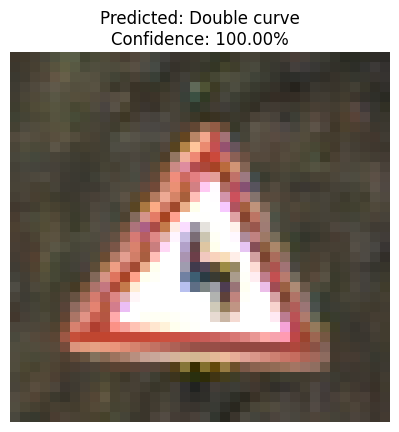

Image: class_21.png
Predicted class index: 14
Predicted class: Double curve
Confidence: 1.0000


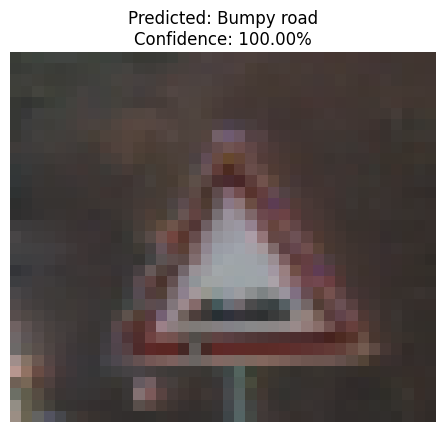

Image: class_22.png
Predicted class index: 15
Predicted class: Bumpy road
Confidence: 1.0000


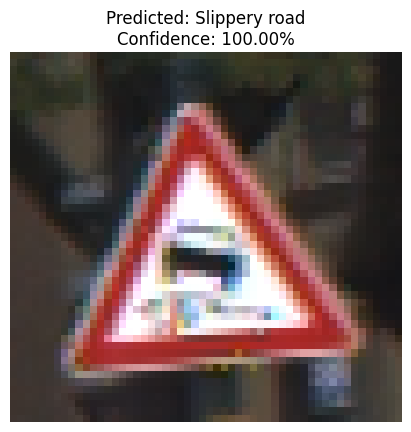

Image: class_23.png
Predicted class index: 16
Predicted class: Slippery road
Confidence: 1.0000


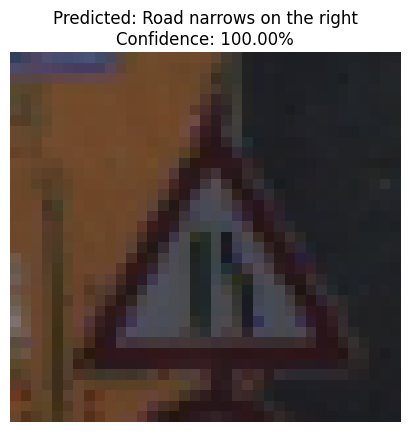

Image: class_24.png
Predicted class index: 17
Predicted class: Road narrows on the right
Confidence: 1.0000


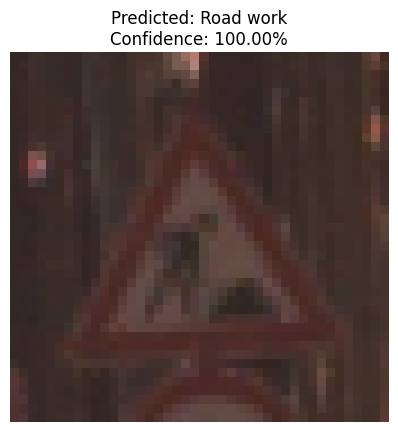

Image: class_25.png
Predicted class index: 18
Predicted class: Road work
Confidence: 1.0000


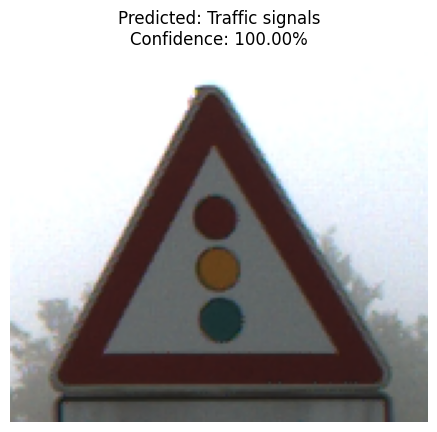

Image: class_26.png
Predicted class index: 19
Predicted class: Traffic signals
Confidence: 1.0000


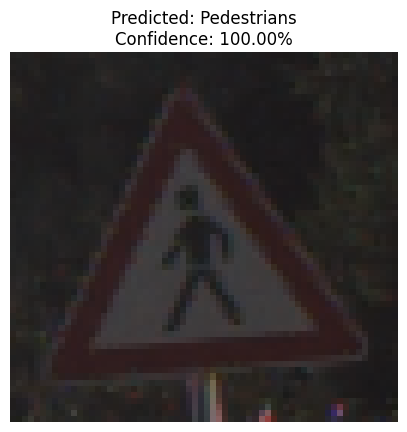

Image: class_27.png
Predicted class index: 20
Predicted class: Pedestrians
Confidence: 1.0000


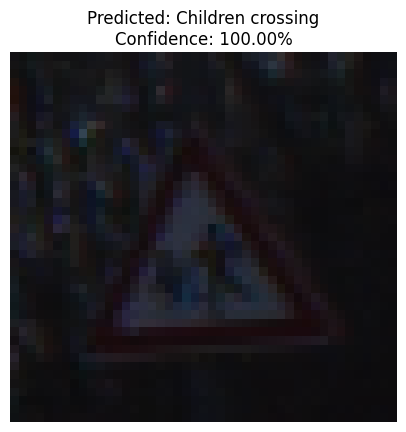

Image: class_28.png
Predicted class index: 21
Predicted class: Children crossing
Confidence: 1.0000


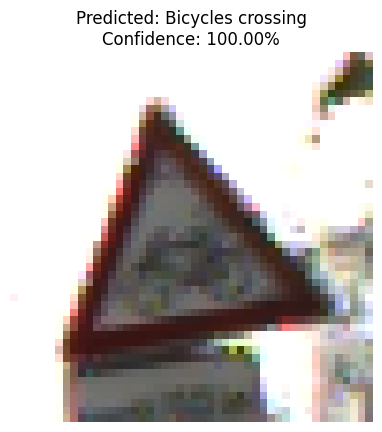

Image: class_29.png
Predicted class index: 22
Predicted class: Bicycles crossing
Confidence: 1.0000


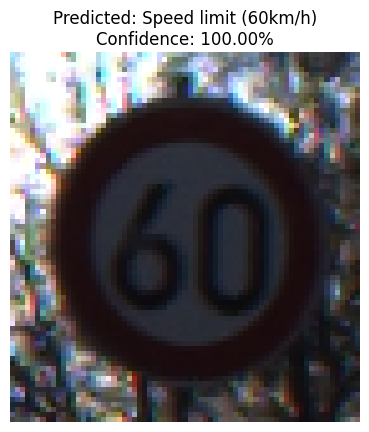

Image: class_3.png
Predicted class index: 23
Predicted class: Speed limit (60km/h)
Confidence: 1.0000


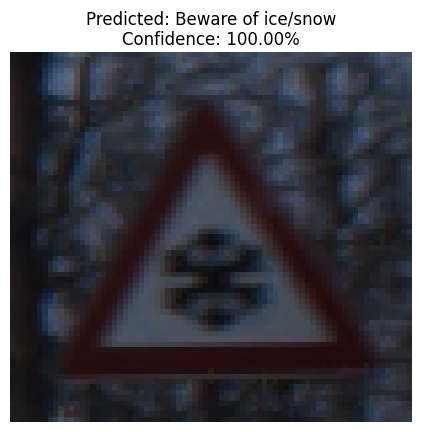

Image: class_30.png
Predicted class index: 24
Predicted class: Beware of ice/snow
Confidence: 1.0000


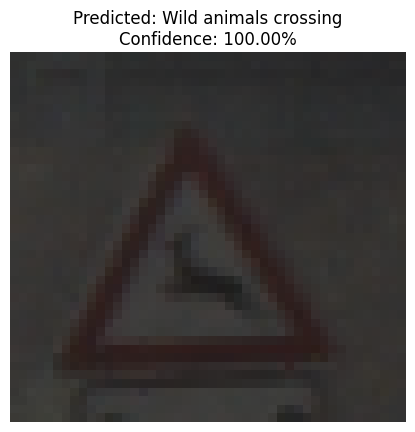

Image: class_31.png
Predicted class index: 25
Predicted class: Wild animals crossing
Confidence: 1.0000


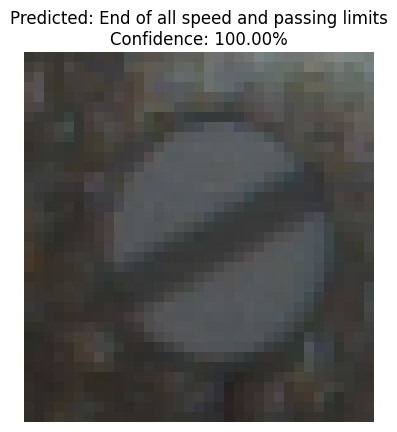

Image: class_32.png
Predicted class index: 26
Predicted class: End of all speed and passing limits
Confidence: 1.0000


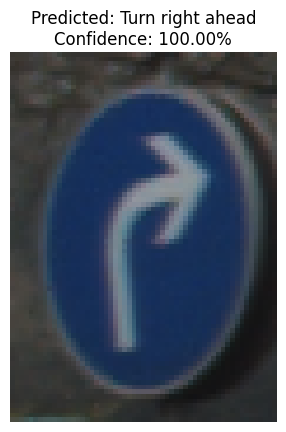

Image: class_33.png
Predicted class index: 27
Predicted class: Turn right ahead
Confidence: 1.0000


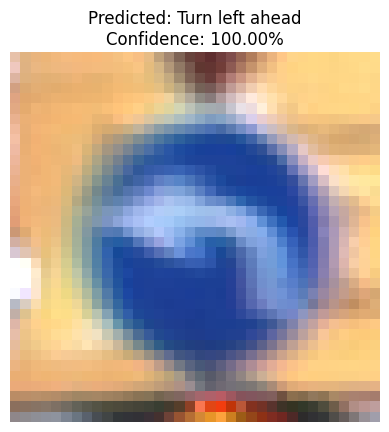

Image: class_34.png
Predicted class index: 28
Predicted class: Turn left ahead
Confidence: 1.0000


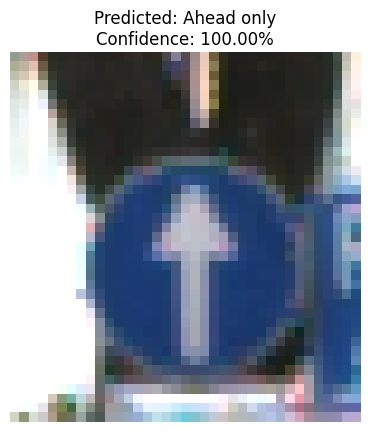

Image: class_35.png
Predicted class index: 29
Predicted class: Ahead only
Confidence: 1.0000


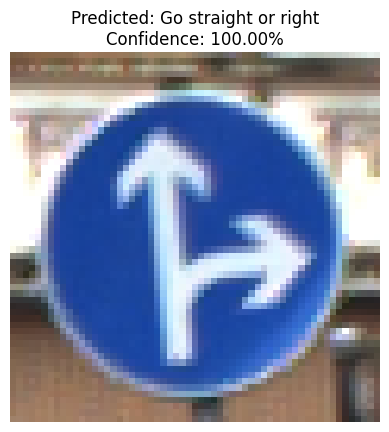

Image: class_36.png
Predicted class index: 30
Predicted class: Go straight or right
Confidence: 1.0000


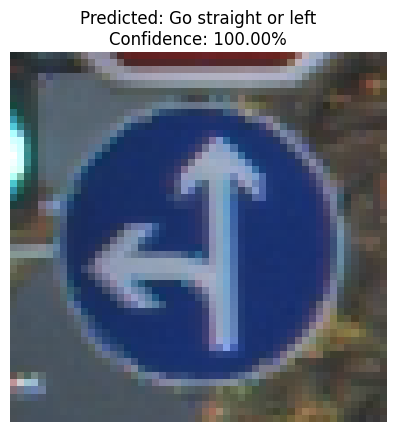

Image: class_37.png
Predicted class index: 31
Predicted class: Go straight or left
Confidence: 1.0000


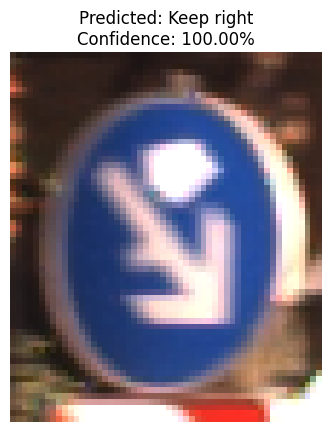

Image: class_38.png
Predicted class index: 32
Predicted class: Keep right
Confidence: 1.0000


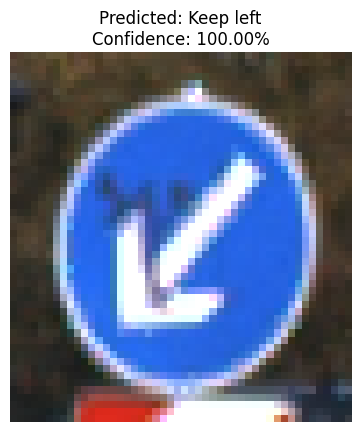

Image: class_39.png
Predicted class index: 33
Predicted class: Keep left
Confidence: 1.0000


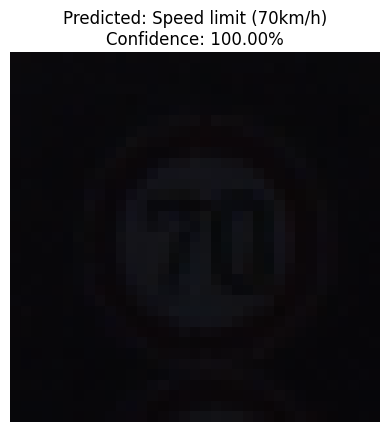

Image: class_4.png
Predicted class index: 34
Predicted class: Speed limit (70km/h)
Confidence: 1.0000


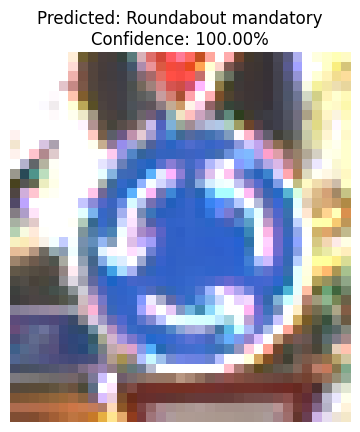

Image: class_40.png
Predicted class index: 35
Predicted class: Roundabout mandatory
Confidence: 1.0000


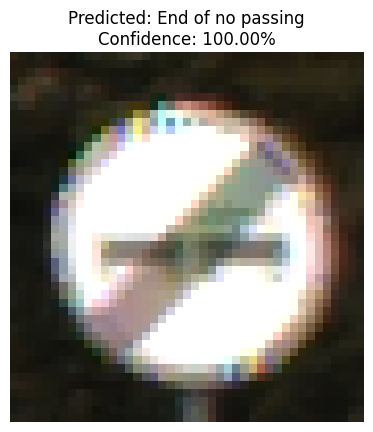

Image: class_41.png
Predicted class index: 36
Predicted class: End of no passing
Confidence: 1.0000


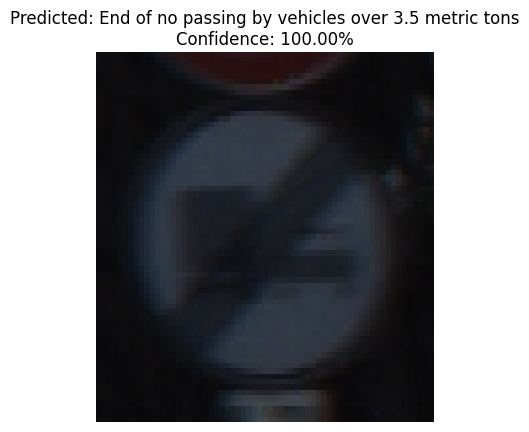

Image: class_42.png
Predicted class index: 37
Predicted class: End of no passing by vehicles over 3.5 metric tons
Confidence: 1.0000


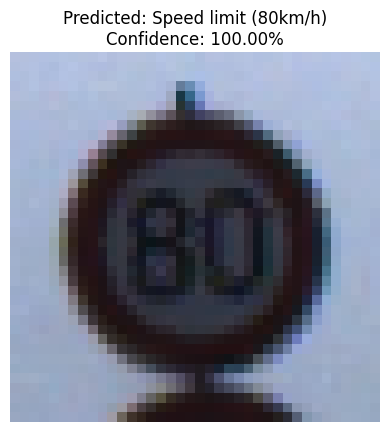

Image: class_5.png
Predicted class index: 38
Predicted class: Speed limit (80km/h)
Confidence: 1.0000


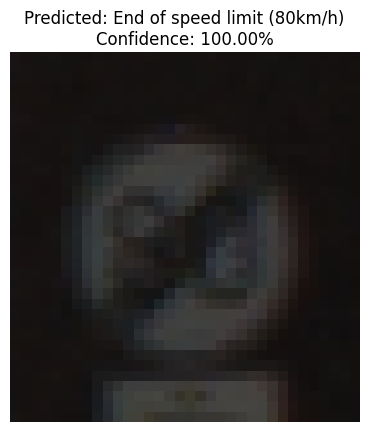

Image: class_6.png
Predicted class index: 39
Predicted class: End of speed limit (80km/h)
Confidence: 1.0000


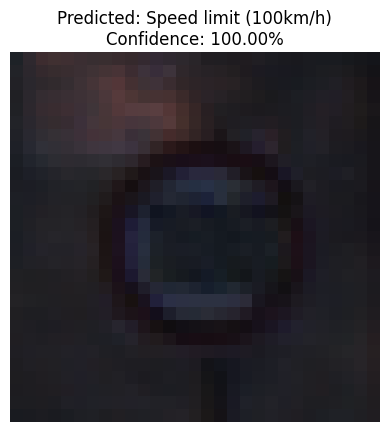

Image: class_7.png
Predicted class index: 40
Predicted class: Speed limit (100km/h)
Confidence: 1.0000


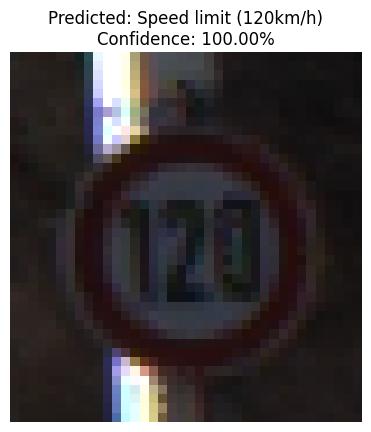

Image: class_8.png
Predicted class index: 41
Predicted class: Speed limit (120km/h)
Confidence: 1.0000


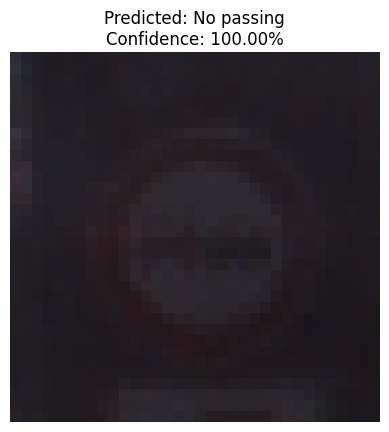

Image: class_9.png
Predicted class index: 42
Predicted class: No passing
Confidence: 1.0000


In [34]:
import os
import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the class mapping for traffic signs
class_map = {
    	0: "Speed limit (20km/h)", 
	1: "Speed limit (30km/h)", 
	12: "Speed limit (50km/h)", 
    	23: "Speed limit (60km/h)", 
	34: "Speed limit (70km/h)", 
	38: "Speed limit (80km/h)", 
   	 39: "End of speed limit (80km/h)", 
	40: "Speed limit (100km/h)", 
	41: "Speed limit (120km/h)", 
   	 42: "No passing", 
	2: "No passing for vehicles over 3.5 metric tons", 
   	 3: "Right-of-way at the next intersection", 
	4: "Priority road", 5: "Yield", 
   	 6: "Stop", 7: "No vehicles", 
	8: "Vehicles over 3.5 metric tons prohibited", 
   	 9: "No entry", 
	10: "General caution", 11: "Dangerous curve to the left", 
   	 13: "Dangerous curve to the right", 14: "Double curve", 15: "Bumpy road", 
   	 16: "Slippery road", 17: "Road narrows on the right", 18: "Road work", 19: "Traffic signals", 
    	20: "Pedestrians", 21: "Children crossing", 22: "Bicycles crossing", 24: "Beware of ice/snow", 
    	25: "Wild animals crossing", 26: "End of all speed and passing limits", 27: "Turn right ahead", 
    	28: "Turn left ahead", 29: "Ahead only", 30: "Go straight or right", 31: "Go straight or left", 
   	 32: "Keep right", 33: "Keep left", 35: "Roundabout mandatory", 36: "End of no passing", 
   	 37: "End of no passing by vehicles over 3.5 metric tons"}

# Function to preprocess the image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Add batch dimension

# Load the custom model
model_path = "resnet_custom_fc_3.pth"
class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        # Fully connected layers
        self.linear1 = nn.Linear(512, 256)
        self.linear2 = nn.Linear(256, 43)

    def forward(self, x):
        # First layer with ReLU, batch norm, and dropout
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# Load ResNet18 and replace the final layer with the custom classifier
model = models.resnet18(pretrained=False)
model.fc = Dc_model()  # Use your custom classifier
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()  # Set model to evaluation mode

# Folder containing test images
test_folder = "TestEachClass"  # Replace with your folder path

# Process each .png file in the folder
for file_name in os.listdir(test_folder):
    if file_name.endswith(".png"):
        image_path = os.path.join(test_folder, file_name)

        # Preprocess the image
        image_tensor = preprocess_image(image_path).to('cpu')  # Ensure the image is on CPU

        # Forward pass through the model
        with torch.no_grad():
            raw_output = model(image_tensor)  # Logits (raw predictions)

        # Get the predicted class index and confidence
        predicted_index = torch.argmax(raw_output, dim=1).item()
        confidence = torch.nn.functional.softmax(raw_output, dim=1)[0][predicted_index].item()

        # Display the image with predicted class and confidence
        image = Image.open(image_path)

        # Plotting the image
        plt.imshow(image)
        plt.axis('off')  # Hide axes

        # Adding the predicted class name and confidence to the image
        class_name = class_map[predicted_index]
        plt.title(f"Predicted: {class_name}\nConfidence: {confidence*100:.2f}%", fontsize=12)

        # Show the image
        plt.show()

        # Print results in the console
        print(f"Image: {file_name}")
        print(f"Predicted class index: {predicted_index}")
        print(f"Predicted class: {class_name}")
        print(f"Confidence: {confidence:.4f}")


Random 10 files from a folder

In [ ]:
import os
import random
import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the class mapping for traffic signs
class_map = {
    	0: "Speed limit (20km/h)", 
	1: "Speed limit (30km/h)", 
	12: "Speed limit (50km/h)", 
    	23: "Speed limit (60km/h)", 
	34: "Speed limit (70km/h)", 
	38: "Speed limit (80km/h)", 
   	 39: "End of speed limit (80km/h)", 
	40: "Speed limit (100km/h)", 
	41: "Speed limit (120km/h)", 
   	 42: "No passing", 
	2: "No passing for vehicles over 3.5 metric tons", 
   	 3: "Right-of-way at the next intersection", 
	4: "Priority road", 5: "Yield", 
   	 6: "Stop", 7: "No vehicles", 
	8: "Vehicles over 3.5 metric tons prohibited", 
   	 9: "No entry", 
	10: "General caution", 11: "Dangerous curve to the left", 
   	 13: "Dangerous curve to the right", 14: "Double curve", 15: "Bumpy road", 
   	 16: "Slippery road", 17: "Road narrows on the right", 18: "Road work", 19: "Traffic signals", 
    	20: "Pedestrians", 21: "Children crossing", 22: "Bicycles crossing", 24: "Beware of ice/snow", 
    	25: "Wild animals crossing", 26: "End of all speed and passing limits", 27: "Turn right ahead", 
    	28: "Turn left ahead", 29: "Ahead only", 30: "Go straight or right", 31: "Go straight or left", 
   	 32: "Keep right", 33: "Keep left", 35: "Roundabout mandatory", 36: "End of no passing", 
   	 37: "End of no passing by vehicles over 3.5 metric tons"}

# Function to preprocess the image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Add batch dimension

# Load the custom model
model_path = "resnet_custom_fc.pth"
class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        # Fully connected layers
        self.linear1 = nn.Linear(512, 256)
        self.linear2 = nn.Linear(256, 43)

    def forward(self, x):
        # First layer with ReLU, batch norm, and dropout
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# Load ResNet18 and replace the final layer with the custom classifier
model = models.resnet18(pretrained=False)
model.fc = Dc_model()  # Use your custom classifier
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()  # Set model to evaluation mode

# Folder containing test images
test_folder = "DatasetUnzipped/test/33"  # Replace with your folder path

# Get all .png files from the folder
all_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(".png")]

# Randomly select 10 images
random_files = random.sample(all_files, 10)

# Prepare Matplotlib grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Iterate over the selected images
for idx, (image_path, ax) in enumerate(zip(random_files, axes)):
    # Preprocess the image
    image_tensor = preprocess_image(image_path).to('cpu')  # Ensure the image is on CPU

    # Forward pass through the model
    with torch.no_grad():
        raw_output = model(image_tensor)  # Logits (raw predictions)

    # Get the predicted class index and confidence
    predicted_index = torch.argmax(raw_output, dim=1).item()
    confidence = torch.nn.functional.softmax(raw_output, dim=1)[0][predicted_index].item()

    # Load the image for visualization
    image = Image.open(image_path)

    # Plot the image
    ax.imshow(image)
    ax.axis('off')  # Hide axes

    # Add prediction details as title
    class_name = class_map[predicted_index]
    ax.set_title(f"Class: {class_name}\nConf: {confidence*100:.1f}%", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()
